In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
basefolder = "/content/drive/MyDrive/AIML_Projects/CapstoneData/Dataset/"
germanfiles = ["commoncrawl_de_en.txt","europarl-v7_de_en.txt","news-commentary-v9_de_en.txt"]
engfiles =["commoncrawl_en_de.txt","europarl-v7_en_de.txt","news-commentary-v9_en_de.txt"]

In [ ]:
def read_files(fileloc, language):
  with open(fileloc,"rb") as f:
    f_lines = f.readlines()
  df = pd.DataFrame(f_lines)
  dfc = df.set_axis([language],axis=1)
  dfc[language] = dfc[language].str.decode("utf-8")
  return dfc

In [ ]:
dfappend=pd.DataFrame()
for efile in range(len(germanfiles)):
  germanfilepath = basefolder+germanfiles[efile]
  print(germanfilepath)
  germandff = read_files(germanfilepath,"german")
  engfilepath = basefolder+engfiles[efile]
  engdff = read_files(engfilepath,"english")
  print(germandff.shape)
  print(engdff.shape)
  dfconcat = pd.concat([germandff, engdff],axis="columns")
  dfappend=pd.concat([dfappend, dfconcat])


/content/drive/MyDrive/AIML_Projects/CapstoneData/Dataset/commoncrawl_de_en.txt
(2399123, 1)
(2399123, 1)
/content/drive/MyDrive/AIML_Projects/CapstoneData/Dataset/europarl-v7_de_en.txt
(1920209, 1)
(1920209, 1)
/content/drive/MyDrive/AIML_Projects/CapstoneData/Dataset/news-commentary-v9_de_en.txt
(201288, 1)
(201288, 1)


In [ ]:
dfappend.shape

(4520620, 2)

In [ ]:
dfappend.head()

,german,english
0,"iron cement ist eine gebrauchs-fertige Paste, ...",iron cement is a ready for use paste which is ...
1,Nach der Aushärtung schützt iron cement die Ko...,iron cement protects the ingot against the hot...
2,feuerfester Reparaturkitt für Feuerungsanlagen...,"a fire restant repair cement for fire places, ..."
3,Der Bau und die Reparatur der Autostraßen...\n,Construction and repair of highways and...\n
4,die Mitteilungen sollen den geschäftlichen kom...,An announcement must be commercial character.\n


In [ ]:
#check for nulls
dfappend.isna().sum()

german     0
english    0
dtype: int64

In [ ]:
dfappend.duplicated().sum()

45510

In [ ]:
df=dfappend.drop_duplicates(subset=None, keep='first', inplace=False)
df.shape

(4475110, 2)

In [ ]:
df.describe()

,german,english
count,4475110,4475110
unique,4461515,4399871
top,\n,\n
freq,2621,4324


In [ ]:
from numpy import array
engGer= array(df)

In [ ]:
engGer= engGer[:1500000]
engGer

array([['iron cement ist eine gebrauchs-fertige Paste, die mit einem Spachtel oder den Fingern als Hohlkehle in die Formecken (Winkel) der Stahlguss -Kokille aufgetragen wird.\n',
        'iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges (corners) of the steel ingot mould.\n'],
       ['Nach der Aushärtung schützt iron cement die Kokille gegen den heissen, abrasiven Stahlguss .\n',
        'iron cement protects the ingot against the hot, abrasive steel casting process.\n'],
       ['feuerfester Reparaturkitt für Feuerungsanlagen, Öfen, offene Feuerstellen etc.\n',
        'a fire restant repair cement for fire places, ovens, open fireplaces etc.\n'],
       ...,
       ['Wir haben spezielle Pauschalen für Ihren Kurzurlaub , Wanderurlaub , Wellnessurlaub , Skiurlaub oder Golfurlaub zusammengestellt und freuen uns, Sie schon bald hier bei uns am Tristachersee begrüßen zu dürfen!\n',
        'The Parkhotel Tristachersee offers you 

In [ ]:
import string
engGer[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in engGer[:,0]]
engGer[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in engGer[:,1]]

In [ ]:
engGer

array([['iron cement ist eine gebrauchsfertige Paste die mit einem Spachtel oder den Fingern als Hohlkehle in die Formecken Winkel der Stahlguss Kokille aufgetragen wird\n',
        'iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges corners of the steel ingot mould\n'],
       ['Nach der Aushärtung schützt iron cement die Kokille gegen den heissen abrasiven Stahlguss \n',
        'iron cement protects the ingot against the hot abrasive steel casting process\n'],
       ['feuerfester Reparaturkitt für Feuerungsanlagen Öfen offene Feuerstellen etc\n',
        'a fire restant repair cement for fire places ovens open fireplaces etc\n'],
       ...,
       ['Wir haben spezielle Pauschalen für Ihren Kurzurlaub  Wanderurlaub  Wellnessurlaub  Skiurlaub oder Golfurlaub zusammengestellt und freuen uns Sie schon bald hier bei uns am Tristachersee begrüßen zu dürfen\n',
        'The Parkhotel Tristachersee offers you a wide range of leisure 

In [ ]:
for i in range(len(engGer)):
    engGer[i,0] = engGer[i,0].lower()
    engGer[i,1] = engGer[i,1].lower()
engGer

array([['iron cement ist eine gebrauchsfertige paste die mit einem spachtel oder den fingern als hohlkehle in die formecken winkel der stahlguss kokille aufgetragen wird\n',
        'iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges corners of the steel ingot mould\n'],
       ['nach der aushärtung schützt iron cement die kokille gegen den heissen abrasiven stahlguss \n',
        'iron cement protects the ingot against the hot abrasive steel casting process\n'],
       ['feuerfester reparaturkitt für feuerungsanlagen öfen offene feuerstellen etc\n',
        'a fire restant repair cement for fire places ovens open fireplaces etc\n'],
       ...,
       ['wir haben spezielle pauschalen für ihren kurzurlaub  wanderurlaub  wellnessurlaub  skiurlaub oder golfurlaub zusammengestellt und freuen uns sie schon bald hier bei uns am tristachersee begrüßen zu dürfen\n',
        'the parkhotel tristachersee offers you a wide range of leisure 

In [ ]:
englist=[]
germanlist=[]

In [ ]:
for i in engGer[:,0]:
      englist.append(len(i.split()))

for i in engGer[:,1]:
      germanlist.append(len(i.split()))

In [ ]:
df1 = pd.DataFrame(engGer, columns =['German', 'English'])

In [ ]:
df1.head

<bound method NDFrame.head of                                                     German  \
0        iron cement ist eine gebrauchsfertige paste di...   
1        nach der aushärtung schützt iron cement die ko...   
2        feuerfester reparaturkitt für feuerungsanlagen...   
3              der bau und die reparatur der autostraßen\n   
4        die mitteilungen sollen den geschäftlichen kom...   
...                                                    ...   
1499995  wandern in osttirol gehört zu den ganz speziel...   
1499996  ob sie im see schwimmen oder am dolomitengolfp...   
1499997  wir haben spezielle pauschalen für ihren kurzu...   
1499998  igemütlich tafeln mit freunde oder familie ode...   
1499999  unsere bodega heißt sie herzlich wilkommen in ...   

                                                   English  
0        iron cement is a ready for use paste which is ...  
1        iron cement protects the ingot against the hot...  
2        a fire restant repair cement for 

In [ ]:
df1['englishlen'] = df1.English.apply(len)
df1['germanlen'] = df1.German.apply(len)

<ipython-input-21-bb55c922455a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.englishlen,ax=axes[0])
<ipython-input-21-bb55c922455a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.germanlen,ax=axes[1])


<Axes: xlabel='germanlen', ylabel='Density'>

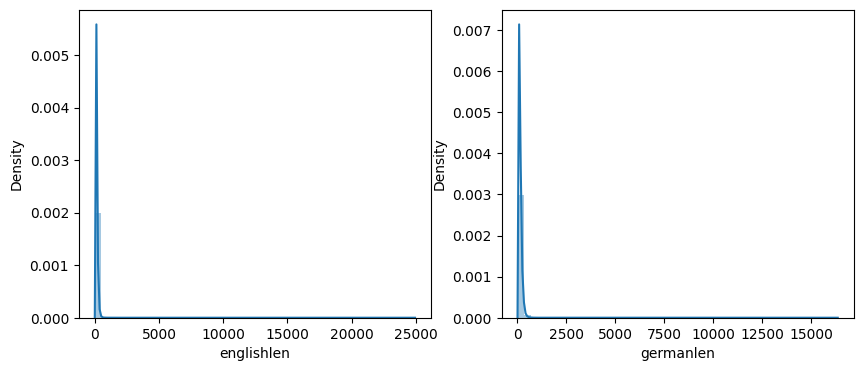

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.distplot(df1.englishlen,ax=axes[0])
sns.distplot(df1.germanlen,ax=axes[1])

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    pattern = re.compile(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?")
    text = re.sub(pattern,' ',text).strip()
    return text

In [ ]:
df1.English = df1.English.apply(clean_text)
df1.German = df1.German.apply(clean_text)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
engtokenizer = tokenization(df1.English)
vocab_size = len(engtokenizer.word_index) + 1

print('English vocab', vocab_size)

English vocab 557616


In [ ]:
gertokenizer = tokenization(df1.German)
vocab_size1 = len(gertokenizer.word_index) + 1

print('German vocab', vocab_size1)

German vocab 1029139


In [ ]:
def encodeSeq(tokenizer, length, lines):
      seq = tokenizer.texts_to_sequences(lines)
      seq = pad_sequences(seq, maxlen=length, padding='post')
      return seq

In [ ]:
maxlength=40
encodeSeq(engtokenizer,maxlength,df1.English)

array([[ 2872, 10220,     7, ...,     0,     0,     0],
       [ 2872, 10220,  5751, ...,     0,     0,     0],
       [    6,  1572, 90314, ...,     0,     0,     0],
       ...,
       [  445,   234,     3, ...,     8, 23829,   787],
       [    6,  1389,  2327, ...,     0,     0,     0],
       [   17,   729,     6, ...,     0,     0,     0]], dtype=int32)

In [ ]:
encodeSeq(gertokenizer,maxlength,df1.German)

array([[ 11129,  60791,     13, ...,      0,      0,      0],
       [    45,      3,  11008, ...,      0,      0,      0],
       [218953, 425199,      9, ...,      0,      0,      0],
       ...,
       [    36,     58,   1335, ...,      0,      0,      0],
       [ 26097,   3203,  21573, ...,      0,      0,      0],
       [   111,  29348,    630, ...,      0,      0,      0]], dtype=int32)

In [ ]:
import nltk
from nltk.corpus import stopwords
#nltk.download()
#stopwords = set(nltk.corpus.stopwords.words('english'))
#dfEng = df1['english'].str.lower().apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df1, test_size=0.1, random_state = 0)

In [ ]:
train_data.head

<bound method NDFrame.head of                                                     German  \
520509   die cflags und cxxflags variablen definieren d...   
1156309  immer wieder  berrascht uns wie viele menschen...   
327559   werde benachrichtigt wenn sblankson neue slide...   
775869   f r layout 2 haben wir probleme gel st und neu...   
592712   id4 gesamtzucker id6bei futtermitteln f r scha...   
...                                                    ...   
152315   wann m chten sie im innside d sseldorf seester...   
963395   richter elektronik ist leiterplattenhersteller...   
117952   au erdem ist er jahr f r jahr beim giro ditali...   
1484405  beflex design hat f r den tender exklusives ho...   
305711   der anstieg gegen ber den vorjahren ergibt sic...   

                                                   English  englishlen  \
520509   the cflags and cxxflags variables define the o...         106   
1156309  always surprising us again how many people rea...         140   
327

In [ ]:
#Drop Columns
train_data = train_data.drop(columns=['germanlen', 'englishlen'],axis=1)
test_data = test_data.drop(columns=['germanlen', 'englishlen'],axis=1)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
train_data

,German,English
0,die cflags und cxxflags variablen definieren d...,the cflags and cxxflags variables define the o...
1,immer wieder berrascht uns wie viele menschen...,always surprising us again how many people rea...
2,werde benachrichtigt wenn sblankson neue slide...,get notified when sblankson adds new stuff
3,f r layout 2 haben wir probleme gel st und neu...,for layout 2 weve fixed problems and added som...
4,id4 gesamtzucker id6bei futtermitteln f r scha...,id4 total sugars id6in case of feedingstuffs f...
...,...,...
1349995,wann m chten sie im innside d sseldorf seester...,when would you like to stay at the innside d s...
1349996,richter elektronik ist leiterplattenhersteller...,richter elektronik is a manufacturer of techno...
1349997,au erdem ist er jahr f r jahr beim giro ditali...,with his collection of unusual bicycles didi w...
1349998,beflex design hat f r den tender exklusives ho...,our company was asked for the production of th...


In [ ]:
test_data

,German,English
0,um zuk nftig bilder direkt an getty images inc...,to be able to export images to the getty image...
1,das immobilienb ro von dodi befindet sich auc...,services of angela farm appartement woodenbung...
2,zum gl ck wieder erh hen abgeholt hat wo er au...,fortunately again raising has picked up where ...
3,nutzen sie rijeka24com f r ihre urlaubsvorbere...,rijeka24com offers you travel information for ...
4,besonders hervorzuheben sind die sehr freundli...,when we got back later we found that the room ...
...,...,...
149995,an einem wochenende bekommt man ein gef hl f r...,in a weekend youll get a taste for the magnifi...
149996,sie besteht aus kalkstein ist rund elf meter h...,it consists of limestone and is about eleven m...
149997,sie ist teil des parc naturel r gional de loise,it is part of parc naturel r gional de loise
149998,unsere galerieebene mit blick auf die start un...,our gallery level is 2000 m2 in size and looks...


In [ ]:
#Tokenization on Training/testing sets
englistok=tokenization(train_data['English'])
train_X_seq, train_X_token=englistok.texts_to_sequences(train_data['English']),englistok


In [ ]:
germantok=tokenization(train_data['German'])
train_Y_seq, train_Y_token = germantok.texts_to_sequences(train_data['German']),germantok

In [ ]:
trainenglishsize = len(train_X_token.word_index) + 1
traingermansize = len(train_Y_token.word_index) + 1

In [ ]:
testengTok=tokenization(test_data['English'])
test_X_seq, test_X_token = testengTok.texts_to_sequences(test_data['English']),testengTok

In [ ]:
testGermantok =tokenization(test_data['German'])
test_Y_seq, test_Y_token = testGermantok.texts_to_sequences(test_data['German']),testGermantok

testenglishsize = len(test_X_token.word_index) + 1
testgermansize = len(test_Y_token.word_index) + 1

In [ ]:
#Padding on test and train sets
length1 = max([len(sentence) for sentence in train_X_seq])
train_X_seq = pad_sequences(train_X_seq, maxlen = length1)

In [ ]:
length2 = max([len(sentence) for sentence in train_Y_seq])
train_Y_seq =pad_sequences(train_Y_seq, maxlen = length2)

In [ ]:
length3 = max([len(sentence) for sentence in test_X_seq])
test_X_seq = pad_sequences(test_X_seq, maxlen = length3)

length4 = max([len(sentence) for sentence in test_Y_seq])
test_Y_seq = pad_sequences(test_Y_seq, maxlen = length4)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional,LSTM
from keras.layers.embeddings import Embedding
from keras.losses import sparse_categorical_crossentropy
from keras.callbacks import ModelCheckpoint